#  Build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### import Required Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style = 'darkgrid')
%matplotlib inline

### Data Gathering

In [60]:
data = pd.read_csv('diabetes.csv')

In [61]:
# Top 5 data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Information about feature

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [62]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No object type feature and no missing value

In [63]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here many feature has zero value
- Glucose
- BloodPressure
- Insulin
- SkinThickness
- BMI

zero value in these feature is not possible so this is act like missing value and we have to handle these value

### Lets handle zero value before any analysis

In [65]:
data_copy = data.copy(deep = True) # creating a copy of dataset
feature = [feature for feature in data_copy.columns if data_copy[feature].min()==0]

In [66]:
# Displaying all Feature value
zero_feature = []
for feature in feature:
    if feature == 'Pregnancies' or feature == 'Outcome':
        pass
    else:
        zero_feature.append(feature)
print(zero_feature)

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [67]:
data_copy[zero_feature] = data_copy[zero_feature].replace(0,np.NaN)

In [68]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Here we have missing value we will handle these missing values in feature engineering section

# Exploratory Data Analysis

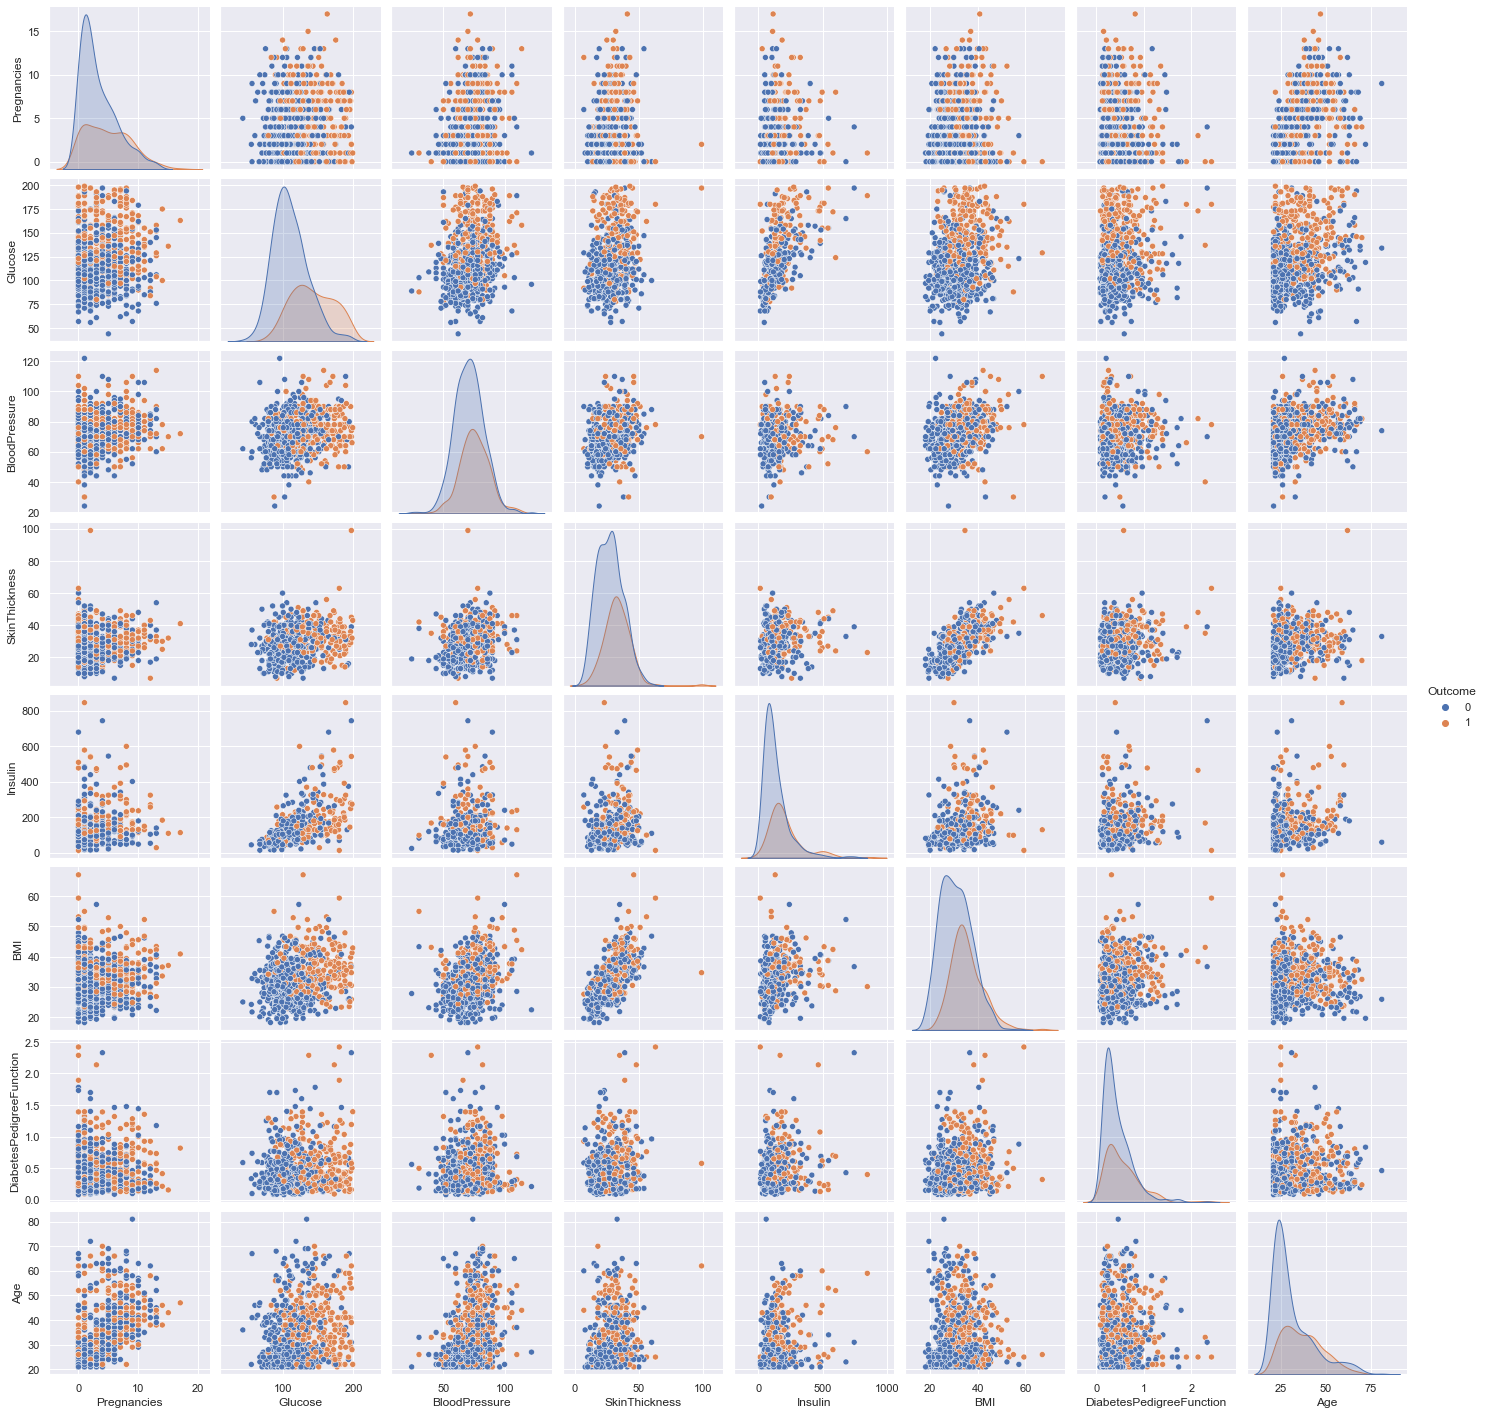

In [69]:
sns.pairplot(data = data_copy, hue = 'Outcome')

### Pragnancies vs glucose

In [70]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

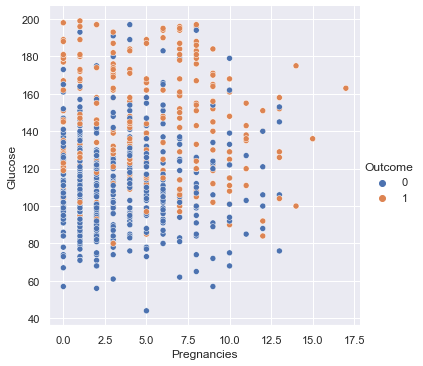

In [71]:
sns.relplot(data = data_copy, x = 'Pregnancies', y = 'Glucose', hue = 'Outcome' )


### Glucose vs bloodPressure

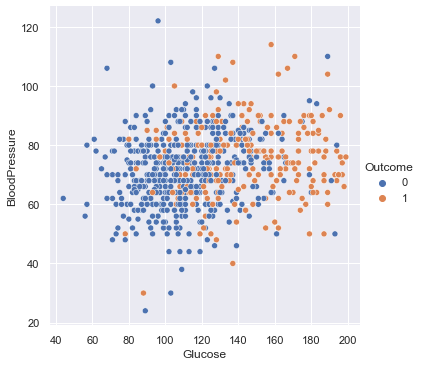

In [72]:
sns.relplot(data = data_copy, x = 'Glucose', y = 'BloodPressure', hue = 'Outcome' )

### Glucose vs Skinthickness

In [73]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


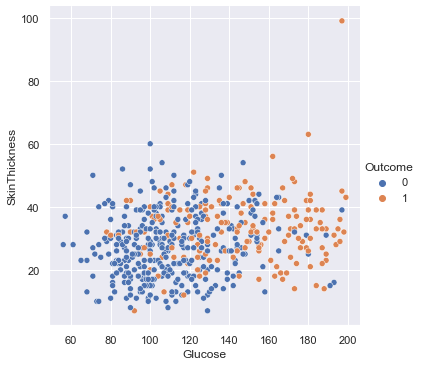

In [74]:
sns.relplot(data = data_copy, x = 'Glucose', y ='SkinThickness', hue = "Outcome")

### Glucose vs Insulin

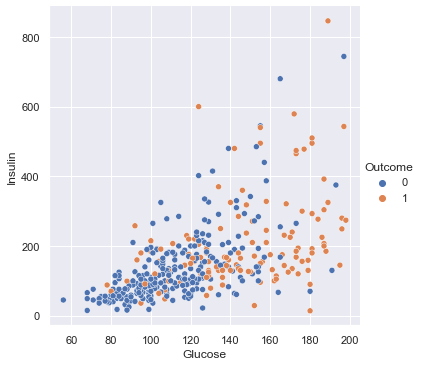

In [75]:
sns.relplot(data = data_copy, x = 'Glucose', y ='Insulin', hue = "Outcome")

### Glucose vs age

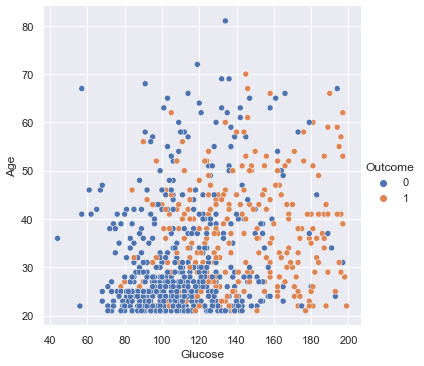

In [76]:
sns.relplot(data = data_copy, x = 'Glucose', y ='Age', hue = "Outcome")

### Glucose vs DiabetesPedigreeFunction

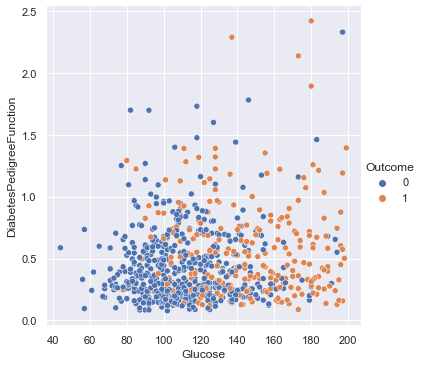

In [77]:
sns.relplot(data = data_copy, x = 'Glucose', y ='DiabetesPedigreeFunction', hue = "Outcome")

In [78]:
data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### BloodPressure vs Age

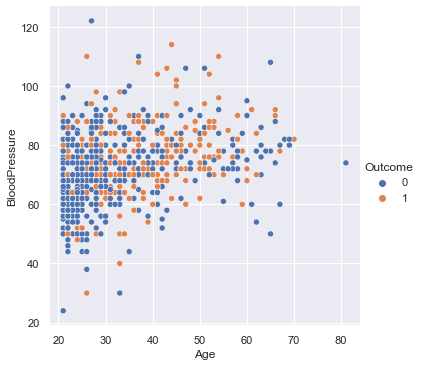

In [79]:
sns.relplot(data = data_copy, x = 'Age', y ='BloodPressure', hue = "Outcome")

# Distribution of a data

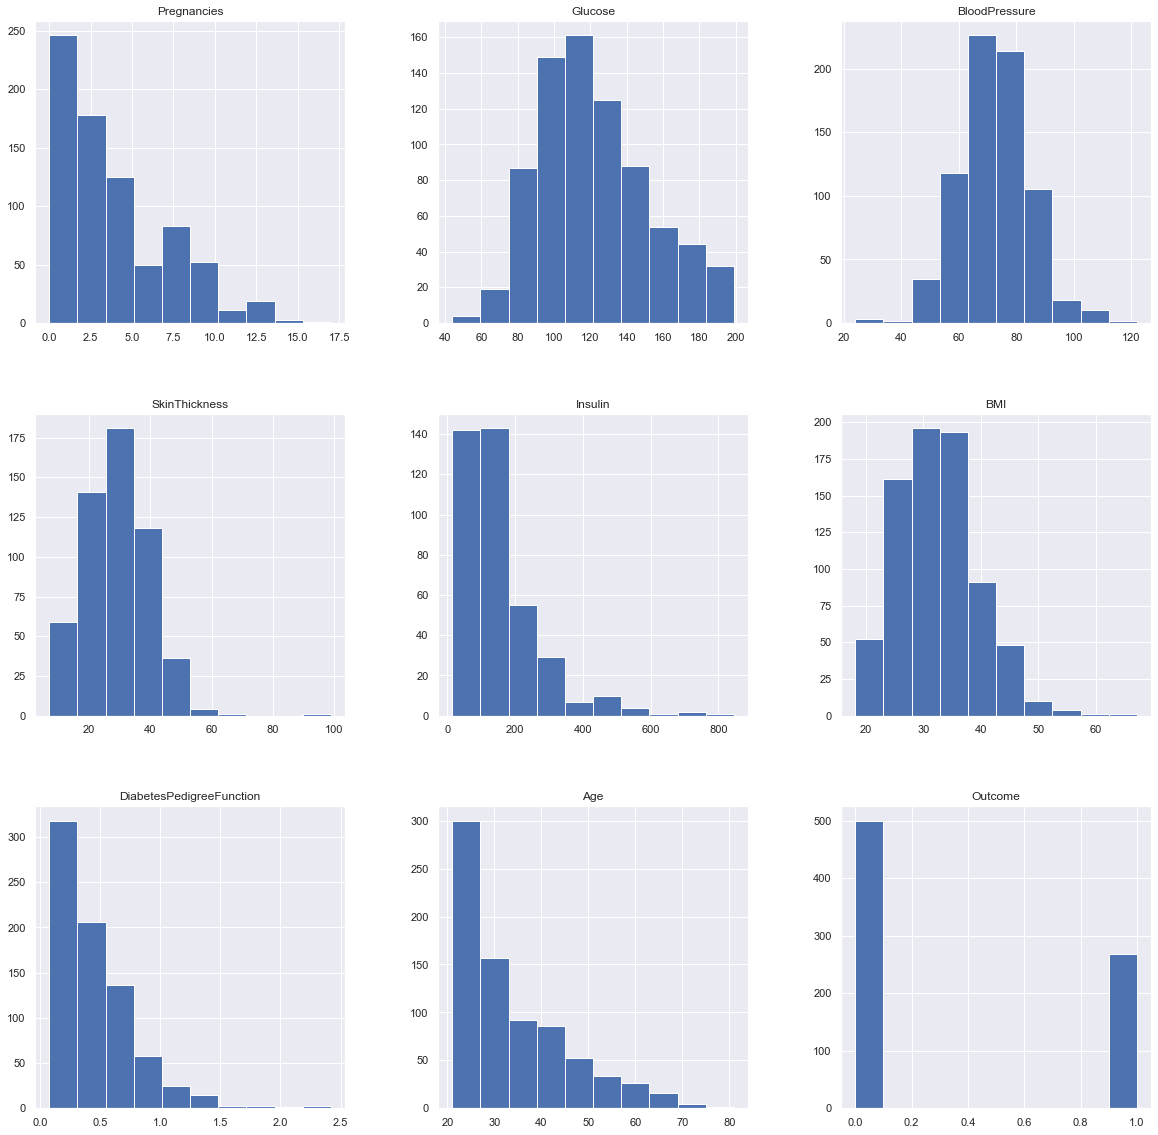

In [80]:
p = data_copy.hist(figsize = (20,20))

Glucose,BloodPressure,BIM has almost guassian distribution

# Feature Engineerning

In [81]:
# lets handle The missing values
zero_feature

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [82]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

lets find the mean median mode of Missing value feature

In [83]:
def central_tendency(df,features):
    for feature in features:
        print(feature+" : "+" Mean:"+str(df[feature].mean())+" Meadian:"+str(df[feature].median()))
        print("*"*100)

In [84]:
central_tendency(data_copy,zero_feature)

Glucose :  Mean:121.6867627785059 Meadian:117.0
****************************************************************************************************
BloodPressure :  Mean:72.40518417462484 Meadian:72.0
****************************************************************************************************
SkinThickness :  Mean:29.153419593345657 Meadian:29.0
****************************************************************************************************
Insulin :  Mean:155.5482233502538 Meadian:125.0
****************************************************************************************************
BMI :  Mean:32.45746367239099 Meadian:32.3
****************************************************************************************************


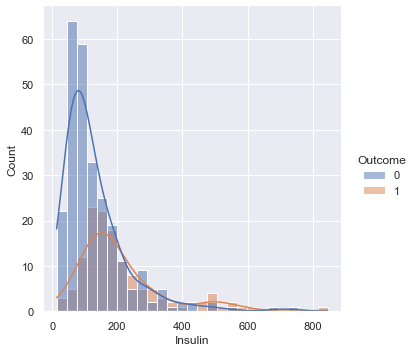

In [85]:
sns.displot(data_copy,x = data_copy.Insulin,kde = True,hue = "Outcome")

In [86]:
def fill_missing_value(df,zero_feature):
    for feature in zero_feature:
        df[feature] = df[feature].fillna(df[feature].median())
    
    return df

In [87]:
dataset = fill_missing_value(data_copy,zero_feature)

In [88]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


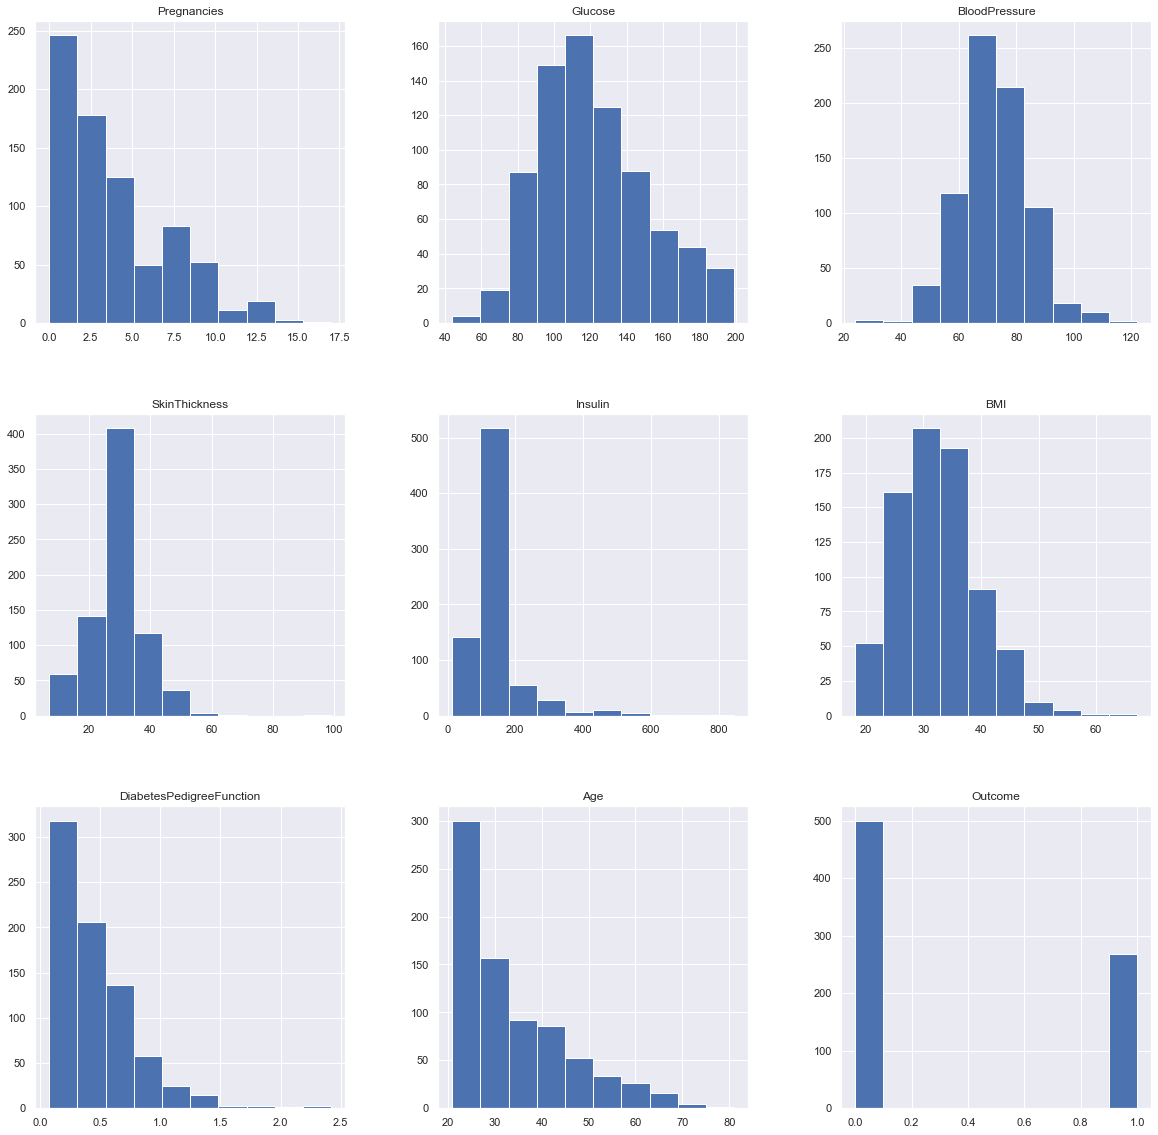

In [90]:
p = data_copy.hist(figsize = (20,20))

In [91]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [92]:
d = dataset.copy()
d['DiabetesPedigreeFunction'] = np.log(d['DiabetesPedigreeFunction'])

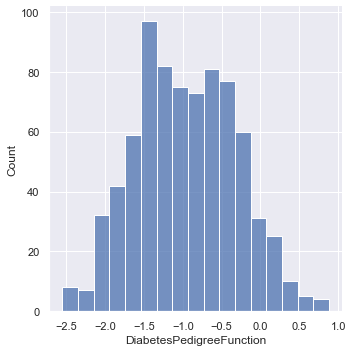

In [93]:
sns.displot(data = d, x = 'DiabetesPedigreeFunction')

In [94]:
dataset['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

### Checking Outliers

<AxesSubplot:xlabel='Glucose'>

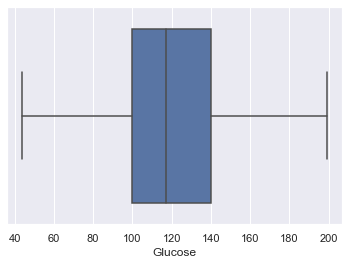

In [103]:
sns.boxplot(data = dataset, x = 'Glucose',hue = 'Outcome')

<AxesSubplot:xlabel='BloodPressure'>

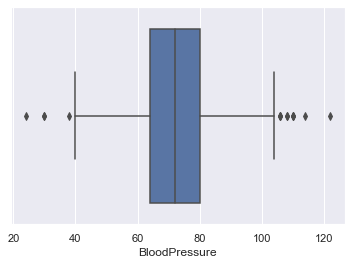

In [104]:
sns.boxplot(data = dataset, x = 'BloodPressure',hue = 'Outcome')
# Here maximum value for high blood pressure is 120
# and min value for BP is 20mm

<AxesSubplot:xlabel='SkinThickness'>

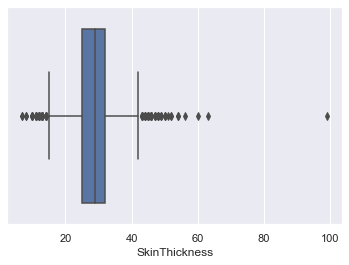

In [106]:
sns.boxplot(data = dataset, x = 'SkinThickness',hue = 'Outcome')

<AxesSubplot:xlabel='Insulin'>

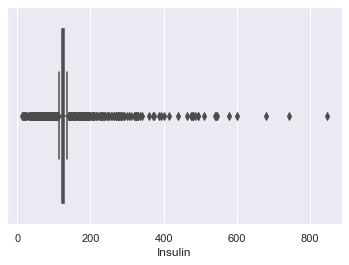

In [107]:
sns.boxplot(data = dataset, x = 'Insulin',hue = 'Outcome')

In [108]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='BMI'>

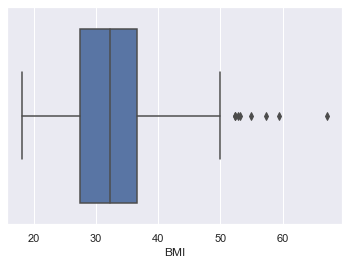

In [109]:
sns.boxplot(data = dataset, x = 'BMI',hue = 'Outcome')

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

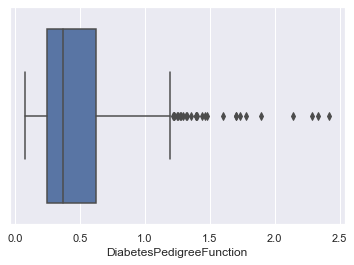

In [110]:
sns.boxplot(data = dataset, x = 'DiabetesPedigreeFunction',hue = 'Outcome')

<AxesSubplot:xlabel='Age'>

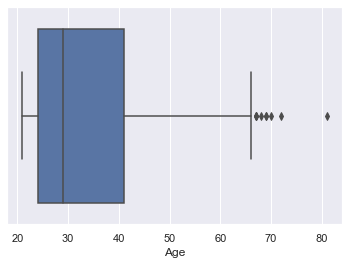

In [111]:
sns.boxplot(data = dataset, x = 'Age',hue = 'Outcome')

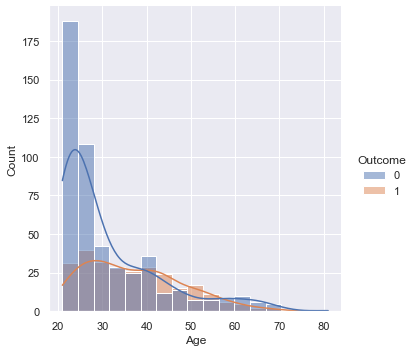

In [112]:
sns.displot(data_copy,x = data_copy.Age,kde = True,hue = "Outcome")

### Correlation between dependent and independent feature

In [113]:
dataset.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Variance Inflation Factor(VIF) ( Multi colinearity )

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = dataset.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(dataset.values, i)
                          for i in range(len(dataset.columns))]

print(vif_data)

                    feature        VIF
0               Pregnancies   3.365145
1                   Glucose  24.181810
2             BloodPressure  33.895891
3             SkinThickness  17.325528
4                   Insulin   4.530475
5                       BMI  34.005998
6  DiabetesPedigreeFunction   3.169422
7                       Age  14.358337
8                   Outcome   2.006922


E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

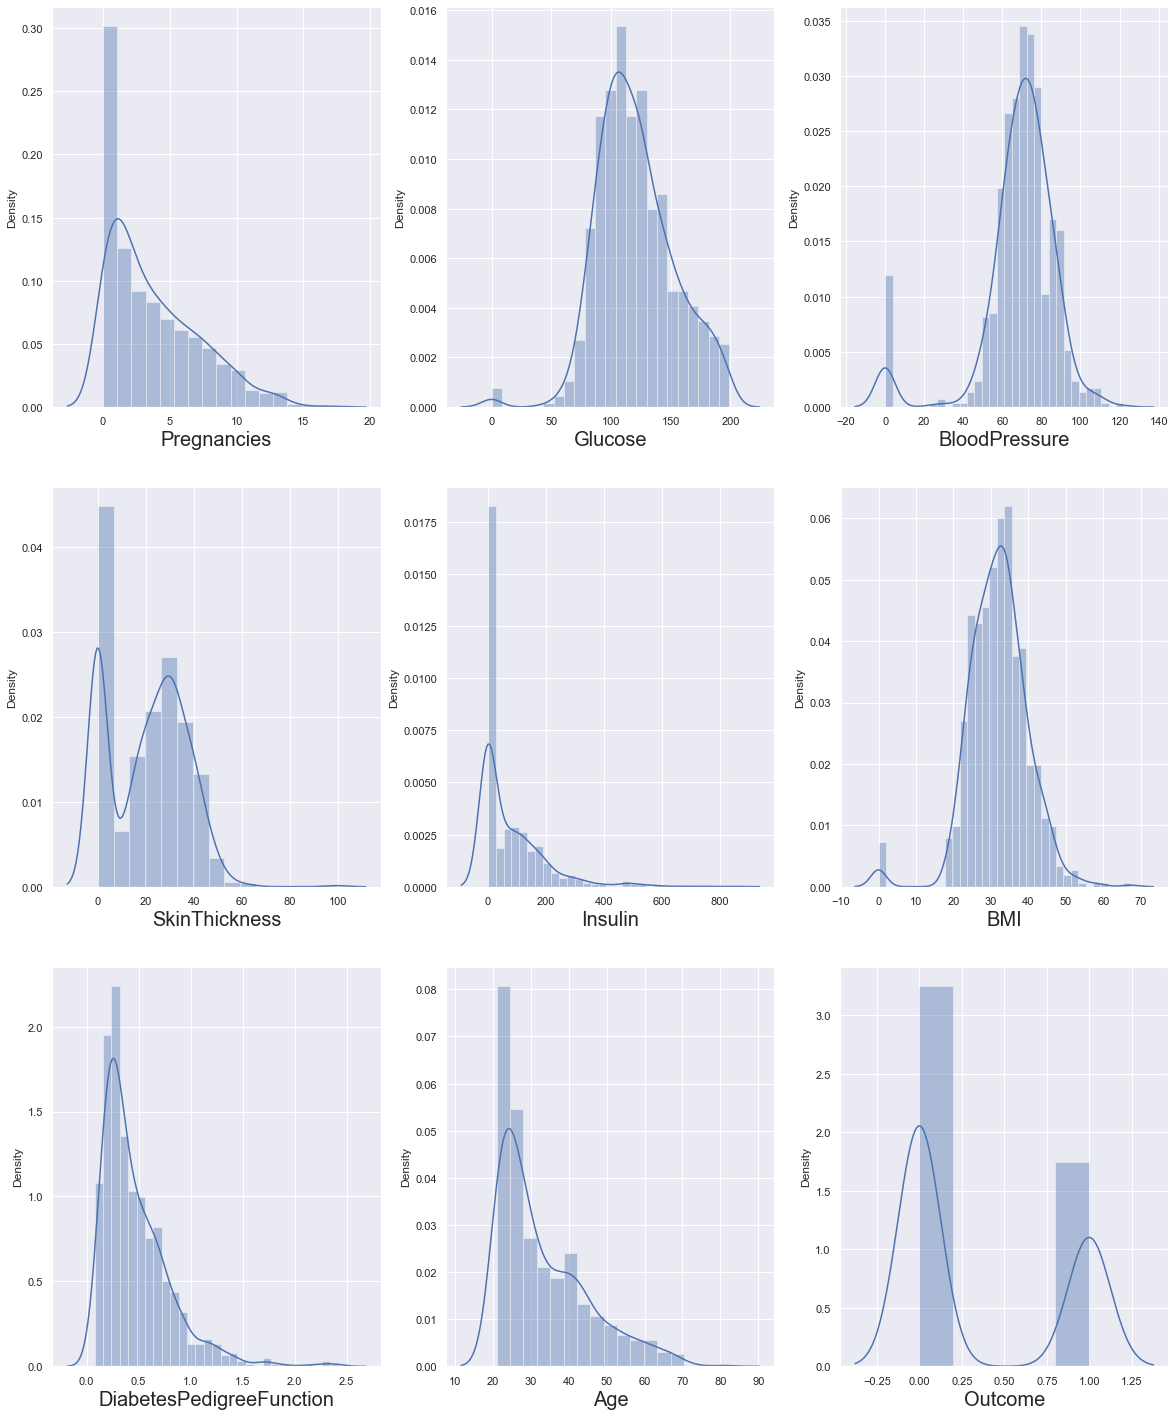

In [119]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_copy:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

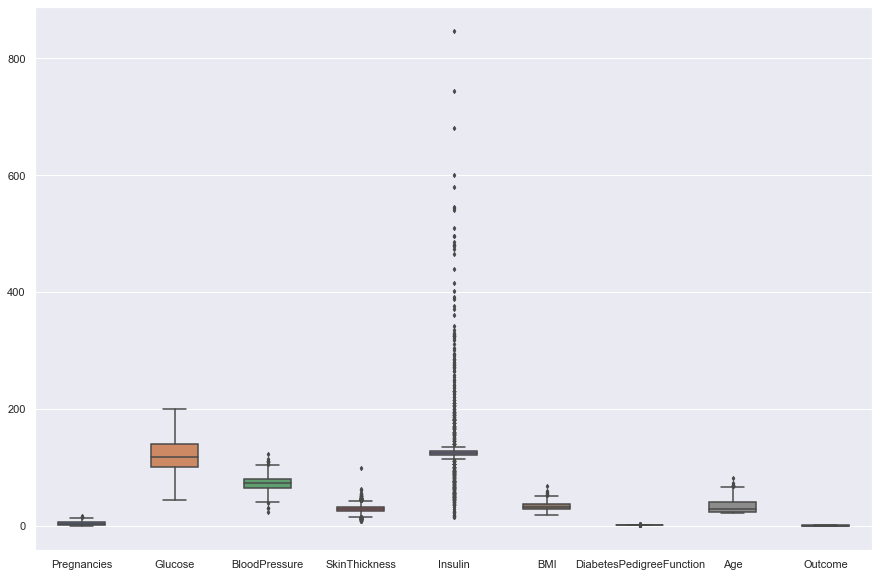

In [120]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_copy, width= 0.5,ax=ax,  fliersize=3)


### Removing Outliers

In [124]:
q = data_copy['Pregnancies'].quantile(0.98)

# we are removing the top 2% data from the Pregnancies column
data_cleaned = data_copy[data_copy['Pregnancies']<q]

q = data_cleaned['BMI'].quantile(0.99)
# here we are removing the top 1 % data from BMI 
data_cleaned = data_cleaned[data_cleaned['BMI']<q]

q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]

q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]

q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

In [125]:
data_cleaned.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.00000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.602374,119.188427,72.132047,28.37092,124.332344,31.908309,0.447338,32.454006,0.327893
std,3.011478,29.273143,11.874232,7.76429,43.835732,6.384392,0.285170,10.964692,0.469794
min,0.000000,44.000000,24.000000,8.00000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.00000,120.000000,27.300000,0.238000,24.000000,0.000000
50%,3.000000,114.500000,72.000000,29.00000,125.000000,32.000000,0.356000,29.000000,0.000000
75%,6.000000,136.000000,80.000000,32.00000,125.000000,35.800000,0.600000,39.000000,1.000000
max,11.000000,199.000000,122.000000,49.00000,291.000000,50.000000,1.476000,66.000000,1.000000


E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\software\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

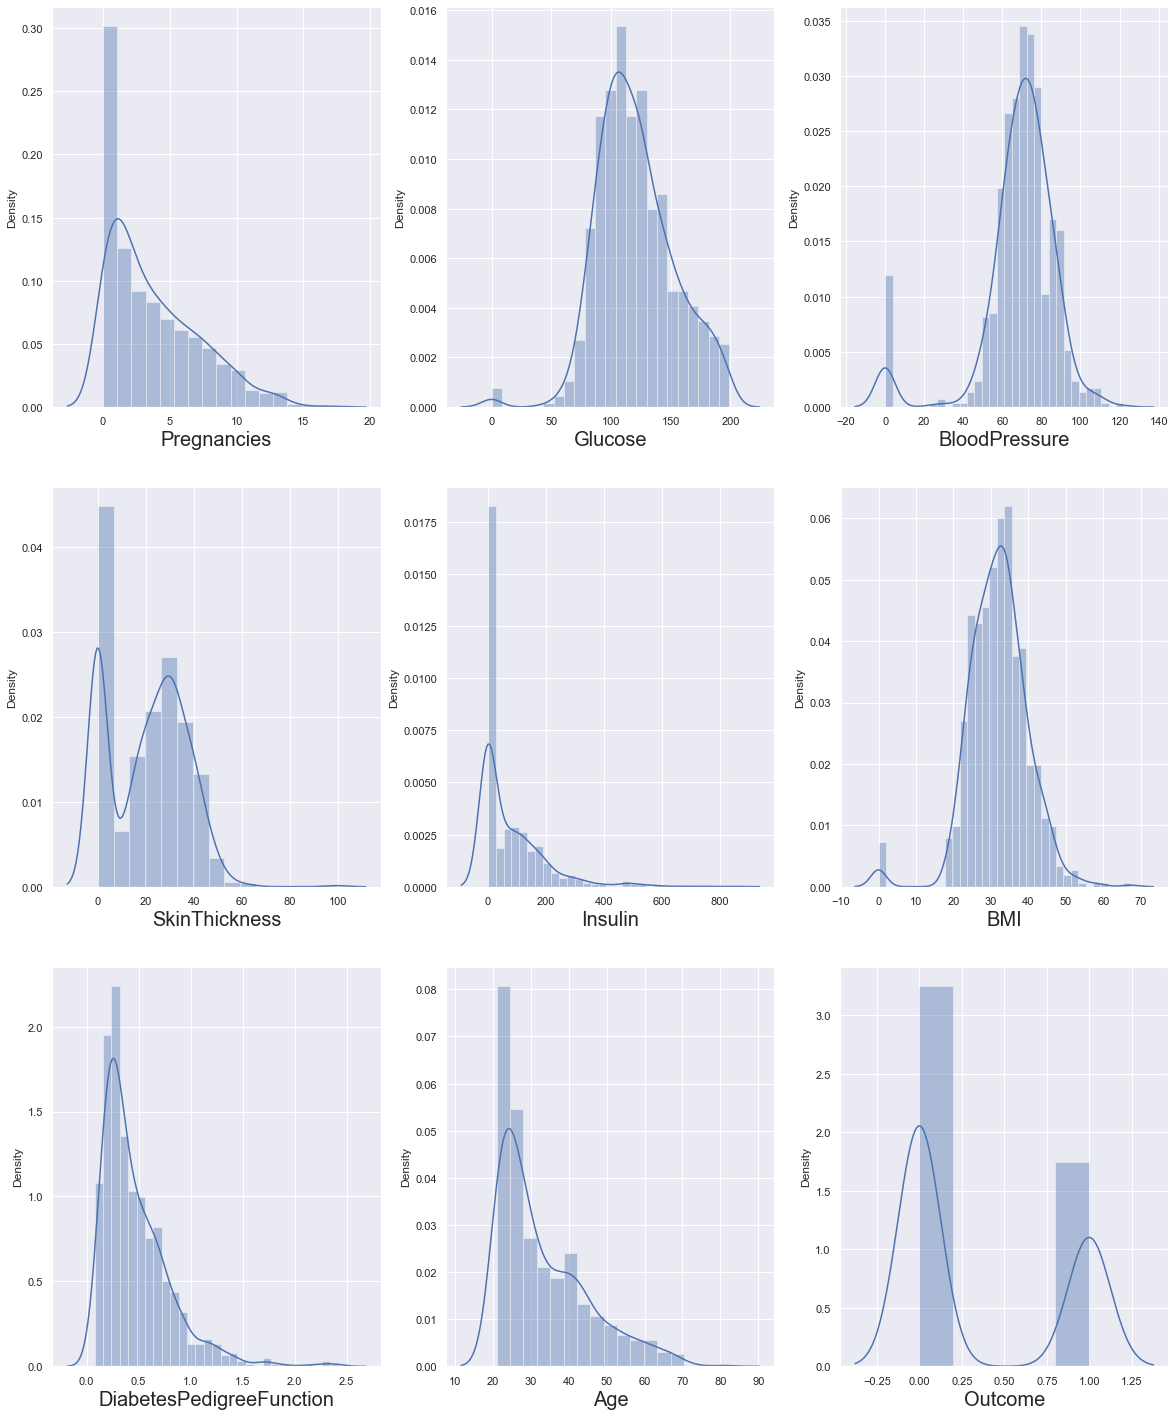

In [127]:
# Lets see how the data is distributed after removing Outlier


plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

### Split data into x and y

In [131]:
x = data_cleaned.drop(['Outcome'],axis = 1)
y = data_cleaned['Outcome']

In [132]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30


In [133]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [136]:
# After Data Cleaning

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

                    feature        VIF
0               Pregnancies   3.508745
1                   Glucose  22.091961
2             BloodPressure  33.572111
3             SkinThickness  20.789116
4                   Insulin  11.257539
5                       BMI  36.677172
6  DiabetesPedigreeFunction   3.520964
7                       Age  16.283658


In [156]:
import joblib
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# ******************************************************************

# function training_and_predict
# take three parameter model , independent data and labeled data

# first it will split data into x_train,x_test,y_train,y_test
# than train model with training data set
# after training model will predict value and based on prediction 
# it will predict classification report

# ******************************************************************

def training_and_predict(model,x_data,y_data):
    if model.__class__.__name__ == 'KNeighborsClassifier' or model.__class__.__name__ == 'LogisticRegression':
        
        print("Model Name : "+model.__class__.__name__)
        print('-'*100)
        
        x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 42, stratify=y_data)
        x_scaled = scaler.fit_transform(x_train)
        
        model.fit(x_scaled,y_train) # training model

        #*****************************
        # cross validation
        score = cross_validate(estimator=model,X = x_scaled,y = y_train,cv = 5)
        print('\n')
        print("Cross Validation score \n")

        for kv in score.items():
            print(kv[0]+" : ",kv[1])
            print('\n')
        #*****************************
        # calculating y_predict
        
        y_pred = model.predict(scaler.transform(x_test))

        #******************************
        #Confusion Metrices
        print('-'*100)
        print('\n')
        print("Confusion Metrix \n")
        print(confusion_matrix(y_test,y_pred))
        #******************************
        #Classification report

        print('-'*100)
        print('\n')
        print("classification Report \n")
        print(classification_report(y_test,y_pred))
        
        joblib.dump(scaler,model.__class__.__name__+'scaler.pkl')
        
        joblib.dump(model,model.__class__.__name__+'model.pkl')
        
    else:
        print("Model Name : "+model.__class__.__name__)
        print('-'*100)
        x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size = 0.2, random_state = 42, stratify=y_data)
        model.fit(x_train,y_train) # training model

        #*****************************
        # cross validation
        score = cross_validate(estimator=model,X = x_train,y = y_train,cv = 5)
        print('\n')
        print("Cross Validation score \n")

        for kv in score.items():
            print(kv[0]+" : ",kv[1])
            print('\n')
        #*****************************
        # calculating y_predict
        y_pred = model.predict(x_test)

        #******************************
        #Confusion Metrices
        print('-'*100)
        print('\n')
        print("Confusion Metrix \n")
        print(confusion_matrix(y_test,y_pred))
        #******************************
        #Classification report

        print('-'*100)
        print('\n')
        print("classification Report \n")
        print(classification_report(y_test,y_pred))
        joblib.dump(model,model.__class__.__name__+'model.pkl')
    

    
    

In [144]:
data_cleaned['Outcome'].value_counts()

0    453
1    221
Name: Outcome, dtype: int64

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_validate

### KNN  Without handling imbalance data

In [147]:
knn = KNeighborsClassifier()

training_and_predict(knn,x,y)

Model Name : KNeighborsClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.01793599 0.00299835 0.00399876 0.00299525 0.00299788 0.00299835
 0.00299931 0.00299859 0.00194979 0.        ]


score_time :  [0.00699878 0.00799203 0.00499606 0.01399159 0.00799441 0.00499678
 0.00599885 0.00499678 0.         0.        ]


test_score :  [0.7037037  0.74074074 0.74074074 0.7037037  0.77777778 0.85185185
 0.77777778 0.75925926 0.77777778 0.75471698]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[75 16]
 [22 22]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.77      0.82      0.80        91
           1       0.58      0.50      0.54        44

    accuracy         

### Decision Tree  Without handling imbalance data

In [148]:
d_tree = DecisionTreeClassifier()
training_and_predict(d_tree,x,y)

Model Name : DecisionTreeClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.00999236 0.01099348 0.00799537 0.01398945 0.01199198 0.00699544
 0.00699472 0.0020864  0.01562428 0.        ]


score_time :  [0.00399923 0.00599647 0.00499821 0.00599766 0.00299907 0.00400066
 0.00399804 0.         0.         0.01562476]


test_score :  [0.61111111 0.64814815 0.66666667 0.72222222 0.81481481 0.85185185
 0.74074074 0.74074074 0.72222222 0.67924528]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[72 19]
 [29 15]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        91
           1       0.44      0.34      0.38        44

    accuracy       

### Decision Tree  Without handling imbalance data

In [153]:
random_forest = RandomForestClassifier()
training_and_predict(random_forest,x,y)

Model Name : RandomForestClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.28521967 0.30078244 0.30631351 0.27559447 0.26954961 0.28518414
 0.29428625 0.27864218 0.28519392 0.28518724]


score_time :  [0.01564169 0.03124619 0.01927304 0.03123021 0.03124809 0.02213883
 0.02214265 0.02217865 0.01565266 0.03127384]


test_score :  [0.75925926 0.81481481 0.77777778 0.81481481 0.77777778 0.87037037
 0.77777778 0.7962963  0.85185185 0.69811321]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[79 12]
 [24 20]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.77      0.87      0.81        91
           1       0.62      0.45      0.53        44

    accuracy       

### Lets Handle the Imbalanced Data

In [150]:
from imblearn.over_sampling import SMOTE
## Without train test split dataset
smote = SMOTE(sampling_strategy='minority')
X_train_sm1, y_train_sm1 = smote.fit_resample(data_cleaned.drop(columns='Outcome'),
                                            data_cleaned.Outcome)
# checking the results
y_train_sm1.value_counts()

0    453
1    453
Name: Outcome, dtype: int64

### KNN  With handling imbalance data

In [157]:
knn = KNeighborsClassifier()
training_and_predict(knn,X_train_sm1,y_train_sm1)

Model Name : KNeighborsClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.00299644 0.00299811 0.00299692 0.00499606 0.00299907]


score_time :  [0.01299381 0.01898932 0.02100134 0.01299191 0.01199222]


test_score :  [0.82068966 0.75862069 0.73793103 0.8137931  0.80555556]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[64 27]
 [ 8 83]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.89      0.70      0.79        91
           1       0.75      0.91      0.83        91

    accuracy                           0.81       182
   macro avg       0.82      0.81      0.81       182
weighted avg       0.82      0.81      0.81       182



In [158]:
random_forest = RandomForestClassifier()
training_and_predict(random_forest,X_train_sm1,y_train_sm1)

Model Name : RandomForestClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.2951355  0.31506348 0.36920404 0.31614757 0.31611395]


score_time :  [0.03124809 0.0379777  0.01565099 0.01562619 0.01562357]


test_score :  [0.86896552 0.82758621 0.8137931  0.84827586 0.84027778]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[67 24]
 [11 80]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        91
           1       0.77      0.88      0.82        91

    accuracy                           0.81       182
   macro avg       0.81      0.81      0.81       182
weighted avg       0.81      0.81      0.81       182



In [159]:
d_tree = DecisionTreeClassifier()
training_and_predict(d_tree,X_train_sm1,y_train_sm1)

Model Name : DecisionTreeClassifier
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.01099348 0.01199055 0.00899458 0.00799346 0.00899148]


score_time :  [0.00597692 0.00299883 0.00399876 0.00399828 0.00299811]


test_score :  [0.73103448 0.73103448 0.66206897 0.75172414 0.82638889]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[60 31]
 [20 71]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.75      0.66      0.70        91
           1       0.70      0.78      0.74        91

    accuracy                           0.72       182
   macro avg       0.72      0.72      0.72       182
weighted avg       0.72      0.72      0.72       182



In [160]:
logestic_reg = LogisticRegression()
training_and_predict(logestic_reg,X_train_sm1,y_train_sm1)

Model Name : LogisticRegression
----------------------------------------------------------------------------------------------------


Cross Validation score 

fit_time :  [0.01399231 0.02475953 0.00599408 0.0069952  0.00699592]


score_time :  [0.00099754 0.         0.00099945 0.0010004  0.        ]


test_score :  [0.76551724 0.75172414 0.69655172 0.74482759 0.79166667]


----------------------------------------------------------------------------------------------------


Confusion Metrix 

[[67 24]
 [19 72]]
----------------------------------------------------------------------------------------------------


classification Report 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        91
           1       0.75      0.79      0.77        91

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182

